# W02. Linear Algebra Basics
## Vector Algebra

Numpy library is best for vector and matrix algebra.
1.  First import numpy library.

In [5]:
import numpy as np

2. We can create vector or matrices using numpy array function

In [6]:
a = np.array([1, 2, 3])
b = np.array([2, 3, 4])
print(a)
print(b)

[1 2 3]
[2 3 4]


2.1 Get size of the vector or matrix using shape method

In [7]:
a.shape

(3,)

2.2 We can add/subtract two vectors

In [8]:
a + b

array([3, 5, 7])

In [9]:
a - b

array([-1, -1, -1])

2.3 Create random arrays of range 0 to 1 using random module 

In [10]:
r = np.random.rand(3, 1)
print(r)

[[0.92874064]
 [0.59742863]
 [0.63627051]]


In [11]:
# using randint function
r2 = np.random.randint(5, size=10)
print(r2)

[0 2 4 1 2 2 4 3 3 3]


4. Dot Product (Inner Product)

- Recall that dot product is $\textbf{a} \cdot \textbf{b} = \textbf{a}^T \textbf{b}$ 

In [12]:
c = np.dot(a, b)
print(c)

20


4.1 Numpy array has special functionality: it can facilitate parallel computation, i.e., vectorization
- For instance, (in below), we compute sequentially over two vectors $\textbf{a}$ and $\textbf{b}$

In [13]:
res = 0
for i in range(3):
    res = res + a[i] * b[i]
print(res)

20


4.2 For practice, let us make it into a function

In [14]:
def dot_product_sequential(x, y):
    res = 0
    for i in range(x.shape[0]):
        res = res + a[i] * b[i]
    return res

In [15]:
dot_product_sequential(a, b)

20

4.3 we can record time using time library and uses time() function to record time

In [16]:
import time

In [17]:
# record time of sequential dot product
a = np.random.rand(10000000)
b = np.random.rand(10000000)

start_time = time.time()
dot_product_sequential(a, b)
end_time = time.time()
sequential_time = end_time - start_time
print("sequential time", sequential_time)

sequential time 11.185212850570679


Now, compare with vectorization technique! numpy arrays provide vectorization, which can parallel compute vectors

In [18]:
start_time = time.time()
np.dot(a, b)
end_time = time.time()
vectorization_time = end_time - start_time
print("vectorization dot product", vectorization_time)

vectorization dot product 0.009532928466796875


4.4 How fast is the vectorization technique?

In [19]:
print("This much Fast: ", sequential_time / vectorization_time)

This much Fast:  1173.3239045618247


# Matrix Algebra

1. Create two matrix

In [20]:
# create two square matrix
A = np.array([[1, 2], [3, 4]])
B = np.array([[5, 6], [7, 8]])

1.1 Row Selection 

In [21]:
# first row of A
A[0, :]

array([1, 2])

1.2 Column Selection

In [22]:
# first column of A
A[:, 0]

array([1, 3])

2. Add / Subtract two matrices

In [23]:
A + B

array([[ 6,  8],
       [10, 12]])

In [24]:
A - B

array([[-4, -4],
       [-4, -4]])

2.1 Broadcasting in numpy arrays!
- For instance, you can add 1 to a vector or a matrix, and all the elements are added by 1 (or subtract/multiplication)
- Let's check

In [25]:
A + 1

array([[2, 3],
       [4, 5]])

In [26]:
A * 3

array([[ 3,  6],
       [ 9, 12]])

In [27]:
A - 1

array([[0, 1],
       [2, 3]])

3.1 multiply two matrix using np.dot function

In [28]:
# multiply two matrix with np.dot function
c = np.dot(a, b)
print(c)

2499799.2766133524


3.2 conventional matrix multiplication
- In matrix algebra, using numpy arrays, we can achieve vectorization
- Let us multiply two matrix with (row) * (column) operations using for conventional multiplication

In [29]:
# initialize matrix C
C1 = np.zeros((2,2))

In [30]:
for i in range(2):
    for j in range(2):
        for k in range(2):
            C1[i][j] += A[i][k] * B[k][j]

In [31]:
print(C1)

[[19. 22.]
 [43. 50.]]


3.3 Function via Conventional Approach

In [32]:
# define function
def trad_mat_mult(A, B):
    '''
    Input: m by n matrix A, n by p matrix B
    Output: Result of A * B
    '''
    # 
    C1 = np.zeros((A.shape[0], B.shape[1]))
    for i in range(A.shape[0]):
        for j in range(B.shape[1]):
            for k in range(A.shape[1]):
                C1[i][j] += A[i][k] * B[k][j]
    return C1

In [33]:
M =  np.array([[1, 2], [3, 4]])
N = np.array([[1, 0], [0, 1]])

In [34]:
print(trad_mat_mult(M, N))

[[1. 2.]
 [3. 4.]]


3.4 We can use dot product for vectorization and get the same result

In [35]:
np.dot(M, N)

array([[1, 2],
       [3, 4]])

3.5 Let's test the performance (vectorization vs conventional)

In [36]:
# create 200 by 200 random matrix
E = np.random.rand(200, 200)
F = np.random.rand(200, 200)
# time recording
start_time = time.time()
trad_mat_mult(E, F)
end_time = time.time()
conv_time = end_time - start_time
print("the conventional time: {:.6f} seconds".format(conv_time))

the conventional time: 25.021754 seconds


In [37]:
# vectorization time
start_time = time.time()
np.dot(E, F)
end_time = time.time()
vec_time = end_time - start_time
print("the vectorization time: {:.6f} seconds".format(vec_time))

the vectorization time: 0.115405 seconds


In [38]:
print("vectorization time is {:.3f} faster".format(conv_time / vec_time))

vectorization time is 216.817 faster


3.6 Visualization: plot the performance graph

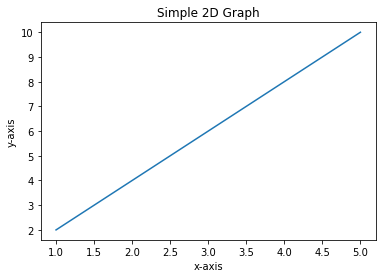

In [39]:
### Simple code to visualize performance time ### 

import matplotlib.pyplot as plt

# Define x and y values
x = [1, 2, 3, 4, 5]
y = [2, 4, 6, 8, 10]

# Plot the graph
plt.plot(x, y)

# Add labels and title
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.title("Simple 2D Graph")

# Show the plot
plt.show()

In order to plot graph, we need test-time
- our experiment: time performance of square matrix multiplication of size ranging from 30 to 50
- first, let us make a function

In [40]:
def conv_time_square_matrix_mult(n):
    '''
    Input:
    n - size of a square matrix
    Output:
    time - multiplication time
    '''
    # create a square matrix of size n
    A = np.random.rand(n, n)
    # time recording
    start_time = time.time()
    trad_mat_mult(A, A)
    end_time = time.time()
    eval_time = end_time - start_time
    return eval_time

- now, let's get a vector of conventional time
- in this case, we need repetition of timing functions

In [41]:
# let us create conv_time
conv_time = np.zeros(20)
for i in range(30, 50):
    conv_time[i % 30] = conv_time_square_matrix_mult(i)

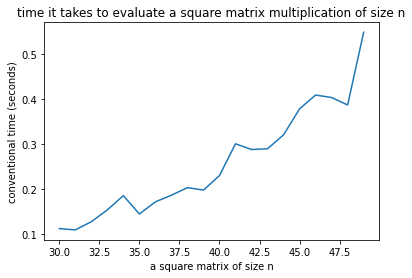

In [42]:
import matplotlib.pyplot as plt

# we need x in range from 30 to 50
x = list(range(30, 50))

# plot graph
plt.plot(x, conv_time)

# some labels
plt.xlabel("a square matrix of size n")
plt.ylabel("conventional time (seconds)")
plt.title("time it takes to evaluate a square matrix multiplication of size n")

# show graph
plt.show()

How about vectorization technique? let's do the same thing to record vectorization timing

In [43]:
def vec_time_mat_mult(n):
    # create a square matrix of size n
    A = np.random.rand(n, n)
    # time
    start_time = time.time()
    np.dot(A, A)
    end_time = time.time()
    eval_time = end_time - start_time
    return eval_time

In [44]:
vec_time = np.zeros(20)
for i in range(30, 50):
    vec_time[i%30] = vec_time_mat_mult(i)

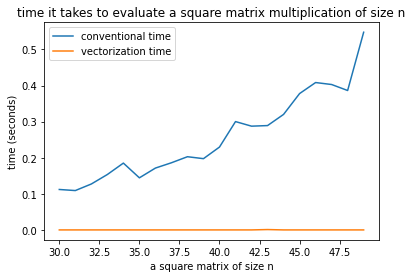

In [45]:
# draw both graph 
plt.plot(x, conv_time, label="conventional time")
plt.plot(x, vec_time, label="vectorization time")

# same label
plt.xlabel("a square matrix of size n")
plt.ylabel("time (seconds)")
plt.title("time it takes to evaluate a square matrix multiplication of size n")

# we need legend
plt.legend()

# show graph
plt.show()